<a href="https://colab.research.google.com/github/RLWH/reinforcement-learning-notebook/blob/master/3.%20Model%20Free%20Prediction/Ch6_Temporal_Difference_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch6 Temporal-Difference Learning

Another way for solving the MDP is by using Temporal-Difference Learning. 

Temporal-Difference Learning is said to be the most central and novel idea for reinforcement learning. It is a combination of Monte Carlo ideas and Dynamic programming ideas. Like Mote Carlo methods, TD methods can learn directly from raw experience without a model of the environment's dynamics. 

Like DP, TD methods update estimates based in part of other learned estimates, without waiting for a final outcome (i.e. bootstraping). 

#### Objective of the chapter
1. Understand how to use TD methods to evaluate a policy, or the prediction problem. 
2. Understand the difference between TD, MC and DP.

## TD Prediction

Both TD and Monte Carlo methods use experience to solve the prediction problem. Given some experience following a policy $\pi$, both methods update their estimate $V$ of $v_{\pi}$ for the nonterminal states $S_t$ occuring in that experience.

#### Constant-$\alpha$ MC
The difference is, MC methods wait until the return (at the end of the episode) of the following visit is known, then use that return as a target for $V(S_t)$. Formally, the every-visit MC method suitable for nonstationary environments is
\begin{equation}
V(S_t) = V(S_t) + \alpha [G_t - V(S_t)]
\end{equation}
where $G_t$ is the actual return following time $t$, and $\alpha$ is a constant step-size parameter. Let's call this method *constant-$\alpha$ MC*. 


#### TD methods
Comparing with MC methods, TD methods do not need to wait until the end of the episode to determine the increment to $V(S_t)$. It just need to wait only until the next time step. 

At time $t + 1$, they immediately form a target and make a useful update using the observed reward $R_{t+1}$ and the estimate $V(S_{t+1})$. The simplest TD method - TD(0) or *one-step TD* -  makes the update immediately on transition to $S_{t+1}$ and receiving $R_{t+1}$. Formally  

\begin{equation}
V(S_t) = V(S_t) + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_t))]
\end{equation}

#### Comparing MC with TD
Comparing to MC methods, the target for TD update is $R_{t+1} + \gamma V(S_{t+1})$. The $\text{TD}(0)$ is a special case of the $\text{TD}(\lambda)$ and n-step TD methods. 

In short:
- MC target is an estimate of the expected value $E_{\pi}[G_t | S_t = s]$ by sampling because the expected value is not known
- The DP target is an estimate because $v_{\pi}(S_{t+1})$ is not known and the current estimate $V(S_{t+1})$ is used instead, given the whole dynamics of MDP is fully known (so the expected value can be calculated)
- The TD target is an estimate because:
  1. It samples the expected values in $E_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t = s]$
  2. It uses the current estimate $V(s_{t+1})$ instead of the true $v_{\pi}$

- Thus, TD methods combine the sampling of Monte Carlo with the bootstraping of DP

![Backup Diagram](https://raw.githubusercontent.com/RLWH/reinforcement-learning-notebook/master/images/backup%20diagrams.PNG)


### The algorithm of TD(0)

#### Backup diagram (p.121)
- The value estimate for the state node at the top of the backup diagram is updated on the basis of the one sample transition from it to the immediately following state
- i.e. Sample update
- Using the value of the successor and the reward along the way to compute a backed-up value, and then updating the value of the original state (or state-action pair) accordingly.
- Sample updates differ from the expected updates of DP methods in that they are based on a single sample successor rather than on a complete distribution of all possible succssors (as what DP does)

#### TD error
- The quantity $R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$ can be considered as an error term. This is called *TD error*
\begin{equation}
\delta_t := R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
\end{equation}
- We can see that TD error is timestep specific, and it depends on the next state and next reward. 
- THus, TD error is only available at timestep $t+1$

#### Pseudo-code

---
```
Input: the policy pi to be evaluated
Algorithm parameter: stepsize alpha in (0,1]
Initialize V(s) for all s in all states, arbitrarily except that V(terminal) = 0

Loop for each episode:
    Initialise S
    Loop for each step of episode:
        A = action given by pi for S
        Take action A, observe R, S'
        V(S) = V(S) + alpha * [R + gamma * V(S') - V(S)]
        S = S'
    until S is terminal
```
---

TD(0) is a *boostrapping* method, like DP, as its update in part of an existing estimate. We know from Ch3 that 


\begin{equation} 
\begin{split}
v_{\pi}(s) & = E_{\pi}[G_t | S_t = s] \\
& = E_{\pi}[R_{t+1} + \gamma G_{t+1} | S_t = s] \\
& = E_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t = s]
\end{split}
\end{equation}

## Demonstration - The Driving Home Example

### Example 6.1

Each day as you drive home from work, you try to predict how long it wil take to get home. When you leave your office, you note the time, the day of week, the weather, and anything else that might be relevant.

Below is the state table:

State | Elapsed Time (min) | predicted Time to Go | Predicted Total Time
--- | --- | --- | ---
Leaving office, Friday at 6| 0 | 30 | 30
Reach car, raining | 5 | 35 | 40
Exiting highway | 20 | 15 | 35
2ndary road, behind truck | 30 | 10 | 40
Entering home street | 40 | 3 | 43
Arrive home | 43 | 0 | 43

If we see this problem as a MDP, the reward in this example are the elapsed time on each leg of the journey. And, the value of each state is the expected time to go. 


**Monte Carlo Estimation**
- Wait till the sequence ends, and calculate the difference between the *estimated value (predicted time to go)* and *actual return (actual time to go)*
- The error term is $G_t - V(S_t)$

State | Elapsed Time (min) | predicted Time to Go | Predicted Total Time | Estimation error of MC methods | State value update (eq6.1, $\alpha$ = 1)
--- | --- | --- | --- | --- | ---
Leaving office, Friday at 6| 0 | 30 | 30 | 43 - 30 = 13 | 30 + 13 = 43
Reach car, raining | 5 | 35 | 40 | 43 - 40 = 3 | 40 + 3 = 43
Exiting highway | 20 | 15 | 35 | 43 - 35 = 8 | 35 + 8 = 43
2ndary road, behind truck | 30 | 10 | 40 | 43 - 40 = 3 | 40 + 3 = 43
Entering home street | 40 | 3 | 43 | 43 - 43 = 0 | 43
Arrive home | 43 | 0 | 43 | 0 | 43

- In any event, the change can only be made offline, that is, after you have reached home, as only at this point you can know any of the actual returns

But is this necessary?

** TD Approach **
- We can learn immediate if some events happen. 
- e.g. On a day with heavy traffic jam, 30 mins from leaving office you're still going to the highway. At this point of time, you already know 30 mins of estimation is too short, and need to be adjusted

State | Elapsed Time (min) | predicted Time to Go | Predicted Total Time | Estimation error of TD methods 
--- | --- | --- | --- | --- 
Leaving office, Friday at 6| 0 | 30 | 30 | 40 - 30 = 10 |
Reach car, raining | 5 | 35 | 40 | 35 - 40 = -5 | 
Exiting highway | 20 | 15 | 35 | 40 - 35 = 5 | 
2ndary road, behind truck | 30 | 10 | 40 | 43 - 40 = 3 | 
Entering home street | 40 | 3 | 43 | 43 - 43 = 0 | 
Arrive home | 43 | 0 | 43 | 0 | 

#### Advantages and Disadvantages of MC vs TD

1. TD can learn before knowing the final outcome
  - TD can learn online after every step
  - MC must wait until end of episode befure return is known
  
2. TD can learn without the final outcome
  - TD can learn from incomplete sequences
  - MC can only learn from complete sequences
  - TD works in continuing (non-terminating) environments
  - MC only works for episodic (terminating) environments



## Illustrating the differences of MC and TD by Random Walk process

In this example, we empirically compare the prediction abilities of TD(0) and constant-$\alpha$ MC when applied to the following Markov Reward process.

![Random Walk Diagram](https://github.com/RLWH/reinforcement-learning-notebook/blob/master/images/RandomWalk.PNG?raw=true)

In this MRP, all episodes start in the center state *C*, then proceed either left or right by one state on each step, with equal probability. Episodes terminate either on the extreme left or extreme right. 

When an episode terminates on the right, a reward of +1 occurs; all other rewards are zero.

Because this task is undiscounted, the true value of each state is the probability of terminating on the right if starting from that state. Thus, the ture value of the center state is $v_{\pi}(C) = 0.5$. The true values of all the states, A through E, is $\frac{1}{6}, \frac{2}{6}, ..., \frac{5}{6}$

In all cases, the approximate value function was initialized to the intermediate value $V(s) = 0.5$, for all $s$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
VALUES = np.zeros(7)
VALUES[1:6] = 0.5
VALUES[6] = 1

In [0]:
# Setup the true values
TRUE_VALUES = np.zeros(7)
TRUE_VALUES[1:6] = np.arange(1, 6)/6.0
TRUE_VALUES[6] = 1

In [0]:
ACTION_LEFT = 0
ACTION_RIGHT = 0

#### Temporal Difference algorithm

In [0]:
def temporal_difference(values, alpha=0.1, batch=False):
  """
  Temporal Difference
  
  Args:
    values: current states value, will be updated if batch is False
    alpha: step size
    batch: Whether to update values
  
  """
  state = 3
  trajectory = [state]
  rewards = [0]
  while True:
    old_state = state
    if np.random.binomial(1, 0.5) == ACTION_LEFT:
      state -= 1
    else:
      state += 1
    
    reward = 0
    
    trajectory.append(state)
    
    # TD update
    if not batch:
      values[old_state] += alpha * (reward + values[state] - values[old_state])
      
    if state == 6 or state == 0:
      break
      
    rewards.append(reward)
      
  return trajectory, rewards, values

In [0]:
def monte_carlo(values, alpha=0.1, batch=False):
  """
  Monte Carlo
  """
  
  state = 3
  trajectory = [state]
  
  # If end up with left terminal state, all returns are 0
  # If end up with right terminal state, all returns are 1
  
  while True:
    if np.random.binomial(1, 0.5) == ACTION_LEFT:
      state -= 1
    else:
      state += 1
      
    trajectory.append(state)
    
    if state == 6:
      returns = 1.0
      break
    elif state == 0:
      returns = 0.0
      break
  
  if not batch:
    for s in trajectory[:-1]:
      # MC update
      values[s] += alpha * (returns - values[s])
      
  return trajectory, [returns], values
      
  

In [0]:
current_values = np.copy(VALUES)
temporal_difference(current_values)

([3, 2, 3, 2, 1, 0],
 [0, 0, 0, 0, 0],
 array([0.  , 0.45, 0.5 , 0.5 , 0.5 , 0.5 , 1.  ]))

In [0]:
current_values = np.copy(VALUES)
monte_carlo(current_values)

([3, 4, 3, 4, 5, 6],
 [1.0],
 array([0.   , 0.5  , 0.5  , 0.595, 0.595, 0.55 , 1.   ]))

In [0]:
%matplotlib inline

In [0]:
def compute_state_value():
    episodes = [0, 1, 10, 100]
    current_values = np.copy(VALUES)
    plt.figure(1)
    for i in range(episodes[-1] + 1):
        if i in episodes:
            plt.plot(current_values, label=str(i) + ' episodes')
        temporal_difference(current_values)
    plt.plot(TRUE_VALUES, label='true values')
    plt.xlabel('state')
    plt.ylabel('estimated value')
    plt.legend()

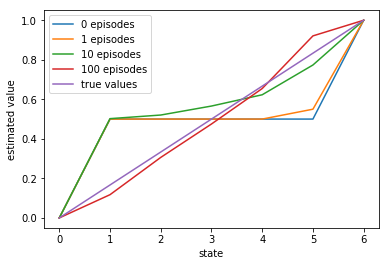

In [0]:
compute_state_value()

In [0]:
def rms_error():
  """
  Calculate the RMS error averaged over states
  """
  
  td_alphas = [0.15, 0.1, 0.05]
  mc_alphas = [0.01, 0.02, 0.03, 0.04]
  episodes = 100 + 1
  runs = 100
  
  for i, alpha in enumerate(td_alphas + mc_alphas):
    total_errors = np.zeros(episodes)
    
    if i < len(td_alphas):
      method = 'TD'
      linestyle = 'solid'
      
    else:
      method = 'MC'
      linestyle = 'dashdot'
      
    for r in range(runs):
      errors = []
      current_values = np.copy(VALUES)
      
      for i in range(0, episodes):
        errors.append(np.sqrt(np.sum(np.power(TRUE_VALUES - current_values, 2))/5))
        
        if method == 'TD':
          _, _, current_values = temporal_difference(current_values, alpha=alpha)
        else:
          _, _, current_values = monte_carlo(current_values, alpha=alpha)
          
      total_errors += np.asarray(errors)
    
    average_errors = total_errors / runs
    
    plt.plot(average_errors, linestyle=linestyle, label="%s, alpha=%.02f" % (method, alpha))
      
  plt.xlabel("episodes")
  plt.ylabel("RMS")
  plt.legend()

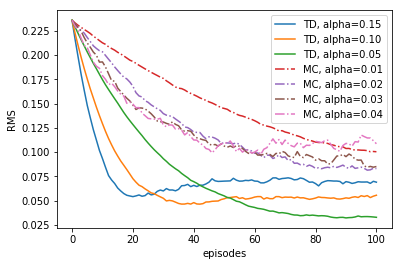

In [0]:
rms_error()

Since we update the estimated value function $V$ once the increments of all states are computed, and the available experience is processed again by using the new value function $V'$. This method is called *Batch update*, because updates are made only after processing each complete *batch* of data

## Optimality of TD(0)

Under batch updating, TD(0) converges dterministically to a single answer independent of the step-size parameter, $\alpha$, as long as $\alpha$ is chosen to be sufficiently small. The constant-$\alpha$ method also converges deterministically under the same conditions but to a different answer.

Below example shows the difference of convergence of TD methods and MC methods.

The reference to batch updating is not regarding any new or undescribed reinforcement learning method, but just a subtle re-ordering of how the experience and updates interact. You can use batch updates where experience is in short supply (as opposed to computation time).

Essentially you can just use the standard TD update mechanism, but instead of taking each piece of experience once as it is observed, you store and re-play the trajectories that you have seen so far (i.e. without selecting new actions). You can keep repeating them, almost like policy evaluation in Dynamic Programming (except only using your sampled trajectories), until the value estimates only change by a small amount - or maybe keep repeating for e.g. 10 seconds, until the next pieces of experience arrive.

Obviously this approach has limitations. It can only evaluate actions that have been taken so far, it cannot explore further. It will probably suffer from sampling bias in the value estimates. However, it will represent in some ways the best estimates of state values seen so far, and provided the stochastic parts of the MDP or policy are not too wild, it may be a good choice where gaining experience is costly or time-consuming.

#### Algorithm
----
```
Initialise total errors
        
```
----

In [0]:
def batch_updating(method, episodes, alpha=1e-3):
  """
  Implementation from 
  https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter06/random_walk.py
  """
  # Calculate the RMS error of TD method vs MC method

  # Setup a sufficiently small alpha
  episodes = 100 + 1
  eps = 1e-3
  runs = 100


  # Initialise the variables


  total_errors = np.zeros(episodes)

  for r in range(runs):

    current_values = np.copy(VALUES)
    errors = []
    trajectories = []
    rewards = []

    for ep in range(episodes):

      if method == 'TD':
        trajectory_, reward_, _ = temporal_difference(current_values, batch=True)
      else:
        trajectory_, reward_, _ = monte_carlo(current_values, batch=True)

      # Save the experience
      trajectories.append(trajectory_)
      rewards.append(reward_)

      while True:
        # Keep looping until the state value funciton converges
        updates = np.zeros(7)

        for trajectory_, rewards_ in zip(trajectories, rewards):
  #         print(trajectory_)
#           print("trajectory ->", trajectory_)
#           print("rewards ->", rewards_)
          for i in range(len(trajectory_) - 1):
            
            if method == 'TD':
              updates[trajectory_[i]] += (rewards_[i]
                                          + current_values[trajectory_[i + 1]]
                                          - current_values[trajectory_[i]])
            else:
              updates[trajectory_[i]] += rewards_ - current_values[trajectory_[i]]
              
  #       print("updates -> ", updates)

        updates *= alpha

        if np.sum(np.abs(updates)) < 1e-3:
          break

        # Only do batch updating when all states is updated
        current_values += updates

      # Calculate rms error
      errors.append(np.sqrt(np.sum(np.power(current_values - TRUE_VALUES, 2)) / 5.0))

  #   print(errors)

    total_errors += np.asarray(errors)

  total_errors /= runs
  
  return total_errors

In [0]:
def figure_6_2():
    episodes = 100 + 1
    td_erros = batch_updating('TD', episodes)
    mc_erros = batch_updating('MC', episodes)
    
#     print(td_erros)
#     print(mc_erros)

    plt.plot(td_erros, label='TD')
    plt.plot(mc_erros, label='MC')
    plt.xlabel('episodes')
    plt.ylabel('RMS error')
    plt.legend()

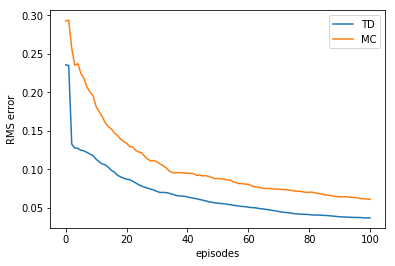

In [0]:
figure_6_2()

It is observed that the TD method can achieve a consistently lower error values, which means it was able to perform better. The straightforward aswer is that the Monte Carlo method is optimal only in a limited way, and that TD is optimal in a way that is more relevant to predicting returns

#### Simple explanation of the difference - By a AB case

TD and MC use different ways to find the optimal solution. 

Consider a MRP with only states A and B, and we have observed the following 8 episodes

Episodes | -    
---- | ----
A, 0, B, 0 | B, 1
B, 1 | B, 1
B, 1 | B, 1
B, 1 | B, 1

What would be the estimated value $V(A)$ and $V(B)$?

- It would be obvious that $V(B)$ would be $\frac{3}{4}$, as 6 out of 8 episodes has a value of 1. 
- However, for state A, we could have different answers
  - If we follow TD(0), The estimate of $V(A)$ depends on the Value of $V(B)$, which would gives $V(A) = \frac{3}{4}$
  - On the other hand, if we use MC methods, we have only seen A once and the return that followed it was 0. Thus, the estimate of $V(A) = 0$
    - In fact, this also gives zero error on data, as we only have one reference point
    
**To summarise**

- Batch Monte Carlo methods always find the estimates that minimise MSE on the training dataset, whereas batch TD(0) always finds the estimates that would be exactly correct for the *maximum-likelihood* model of the Markov process. 
- Batch TD(0), instead, uses emperical data to build a *maximum-likehood* model to estimate the transition probability from $i$ to $j$, that is the fraction of observed transitions from $i$ that went to $j$ from the data, and the associated expected reward is the average of the rewards observed on those transitions. 
- Given this model, we can compuate the estimate of the value function that would be exactly correct if the model were exactly correct. This is called *certainty-equivalence estimate*, because it is equivalent to assuming that the estimate of the underlying process was known with certainty rather than being approximated
  - TD(0) converges to the certainty-equivalence estimate
- TD exploits Markov property
  - Usually more efficient in Markov environments
- MC does not exploit Markov property
  - Usually more effective in non-Markov environments